In [1]:
import numpy as np
import os
from skimage import io
from PIL import ImageFile
import cv2
import matplotlib.pyplot as plt
from Algorithm.lbph import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
haar_file = 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(haar_file)

In [3]:
yalefaces_paths=[]
yalefaces_images = []
yalefaces_labels = []
yalefaces_cut_images = []
folder = './Data/YaleFaces'


for element in os.listdir(folder):
    if element!='Readme.txt':
        yalefaces_paths.append(os.path.join(folder,element))
        
for path in yalefaces_paths:
    image = io.imread(path,as_gray=True)
    yalefaces_images.append(image)
    label = int(os.path.split(path)[1].split('.')[0].replace("subject",""))-1
    yalefaces_labels.append(label)


for i in range(len(yalefaces_images)):
    image = yalefaces_images[i]
    face = face_detector.detectMultiScale(image)
    x,y,w,h = face[0]
    cut_image = image[y:y+h,x:x+w]
    cut_image = cv2.resize(cut_image,(130,100))
    yalefaces_cut_images.append(cut_image)
    
yalefaces_labels = np.array(yalefaces_labels).reshape(-1,1)

In [4]:
len(yalefaces_cut_images)

330

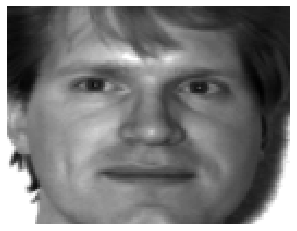

In [5]:
sample = yalefaces_cut_images[0]

plt.imshow(sample,cmap='gray')
plt.axis('off')
plt.show()

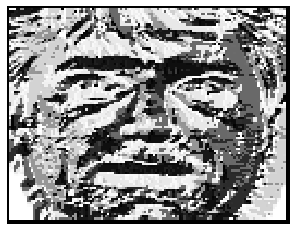

In [6]:
lbp_image = getLBPimage(sample)
plt.imshow(lbp_image,cmap='gray')
plt.axis('off')
plt.show()

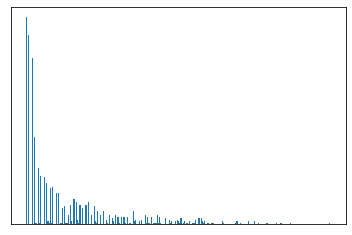

In [7]:
shaped = blockshaped(lbp_image,10,13)
    
xBlocks = []
for s in shaped:
    xBlocks.append(histogram(s))
lbph = np.concatenate(xBlocks)

plt.hist(lbph,bins=2**8)
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
x = []

for img in yalefaces_cut_images:
    lbp = getLBPimage(img)
    shaped = blockshaped(lbp,10,13)
    
    xBlocks = []
    for s in shaped:
        xBlocks.append(histogram(s))
    lbph = np.concatenate(xBlocks)
    
    x.append(lbph)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,yalefaces_labels,test_size=0.2)

In [10]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
model = SVC()
model.fit(X_train_pca,y_train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred = model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_pred,y_test))

Test Accuracy: 1.0
